In [9]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as mplot



data_training = pd.read_csv("./NSL-KDD-Dataset/KDDTrain+.txt")
dt = data_training

#Adding Column Headers
columns = ([
			'duration',
			'protocol_type',
			'service',
			'flag',
			'src_bytes',
			'dst_bytes',
			'land',
			'wrong_fragment',
			'urgent',
			'hot',
			'num_failed_logins',
			'logged_in',
			'num_compromised',
			'root_shell',
			'su_attempted',
			'num_root',
			'num_file_creations',
			'num_shells',
			'num_access_files',
			'num_outbound_cmds',
			'is_host_login',
			'is_guest_login',
			'count',
			'srv_count',
			'serror_rate',
			'srv_serror_rate',
			'rerror_rate',
			'srv_rerror_rate',
			'same_srv_rate',
			'diff_srv_rate',
			'srv_diff_host_rate',
			'dst_host_count',
			'dst_host_srv_count',
			'dst_host_same_srv_rate',
			'dst_host_diff_srv_rate',
			'dst_host_same_src_port_rate',
			'dst_host_srv_diff_host_rate',
			'dst_host_serror_rate',
			'dst_host_srv_serror_rate',
			'dst_host_rerror_rate',
			'dst_host_srv_rerror_rate',
			'attack',
			'level'
		])


dt.columns = columns

# meta-summary
# data_training.info()
# print(data_training.head(5))

dt.head(5)

# Data general statistics
dt.describe().T

#Check for null values in dataset
dt.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [7]:

dt = data_training

# Frequency Table of attack compared with protocol_type
attack_vs_protocol = pd.crosstab(dt.attack, dt.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack,,,
back,0,956,0
buffer_overflow,0,30,0
ftp_write,0,8,0
guess_passwd,0,53,0
imap,0,11,0
ipsweep,3117,482,0
land,0,18,0
loadmodule,0,9,0
multihop,0,7,0


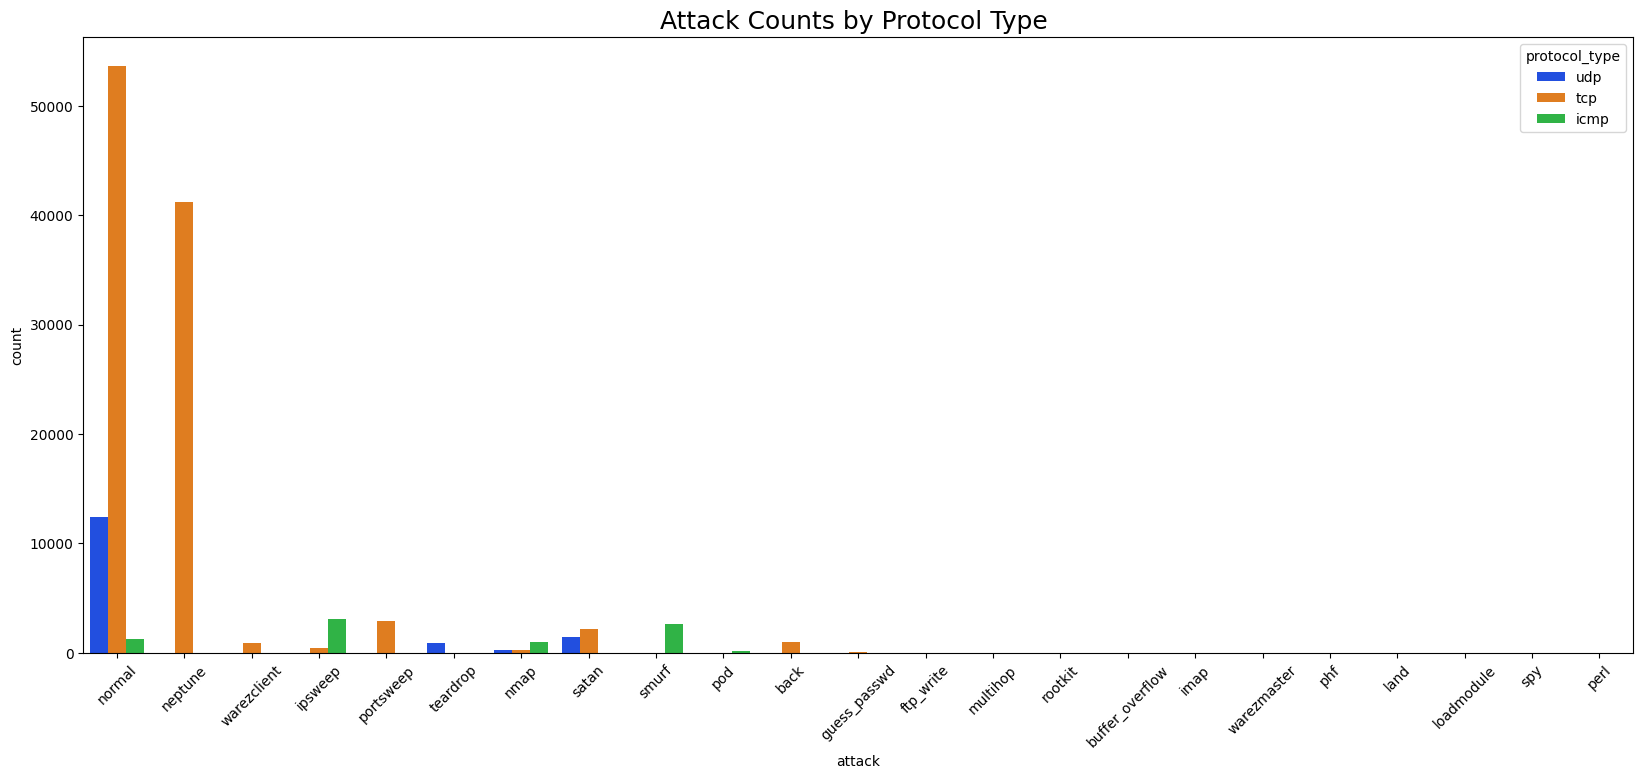

In [71]:
import seaborn as sb

mplot.figure(figsize=(20,8))

#All Data
sb.countplot(x='attack',data=dt,hue='protocol_type',palette='bright')

#Excluding 'normal'
dt_normal_filtered = dt[dt['attack']!='normal']
# sb.countplot(x='attack',data=dt_normal_filtered,hue='protocol_type')

#Excluding 'normal' and 'neptune'
categories_to_exclude=['normal','neptune']
df_filtered_multiple = dt[~dt['attack'].isin(categories_to_exclude)]
# sb.countplot(x='attack',data=df_filtered_multiple,hue='protocol_type',palette='bright')

mplot.xticks(rotation=45)
mplot.title('Attack Counts by Protocol Type ',fontdict={'fontsize':18})
mplot.show()

0          SF
1          S0
2          SF
3          SF
4         REJ
         ... 
125967     S0
125968     SF
125969     SF
125970     S0
125971     SF
Name: flag, Length: 125972, dtype: object


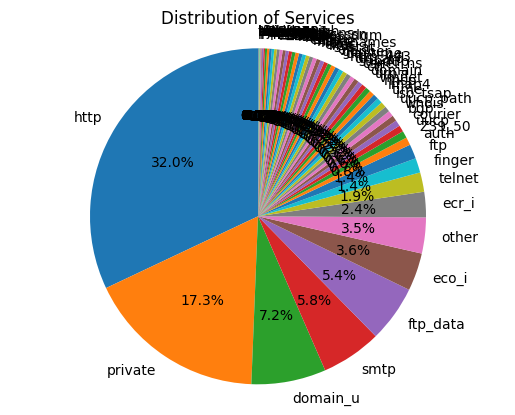

In [19]:
import pandas as pd

# Sample data
# data = pd.Series([15, 30, 45, 10], index=['Category A', 'Category B', 'Category C', 'Category D'])

dt_onlynormal_filtered = dt[dt['attack']=='normal']
data = pd.Series(dt['service'].value_counts())


print(dt['flag'])
# Create the pie chart using Pandas' plot.pie()
mplot.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
mplot.axis('equal') # Ensures a circular pie chart
mplot.title('Distribution of Services')
mplot.show()

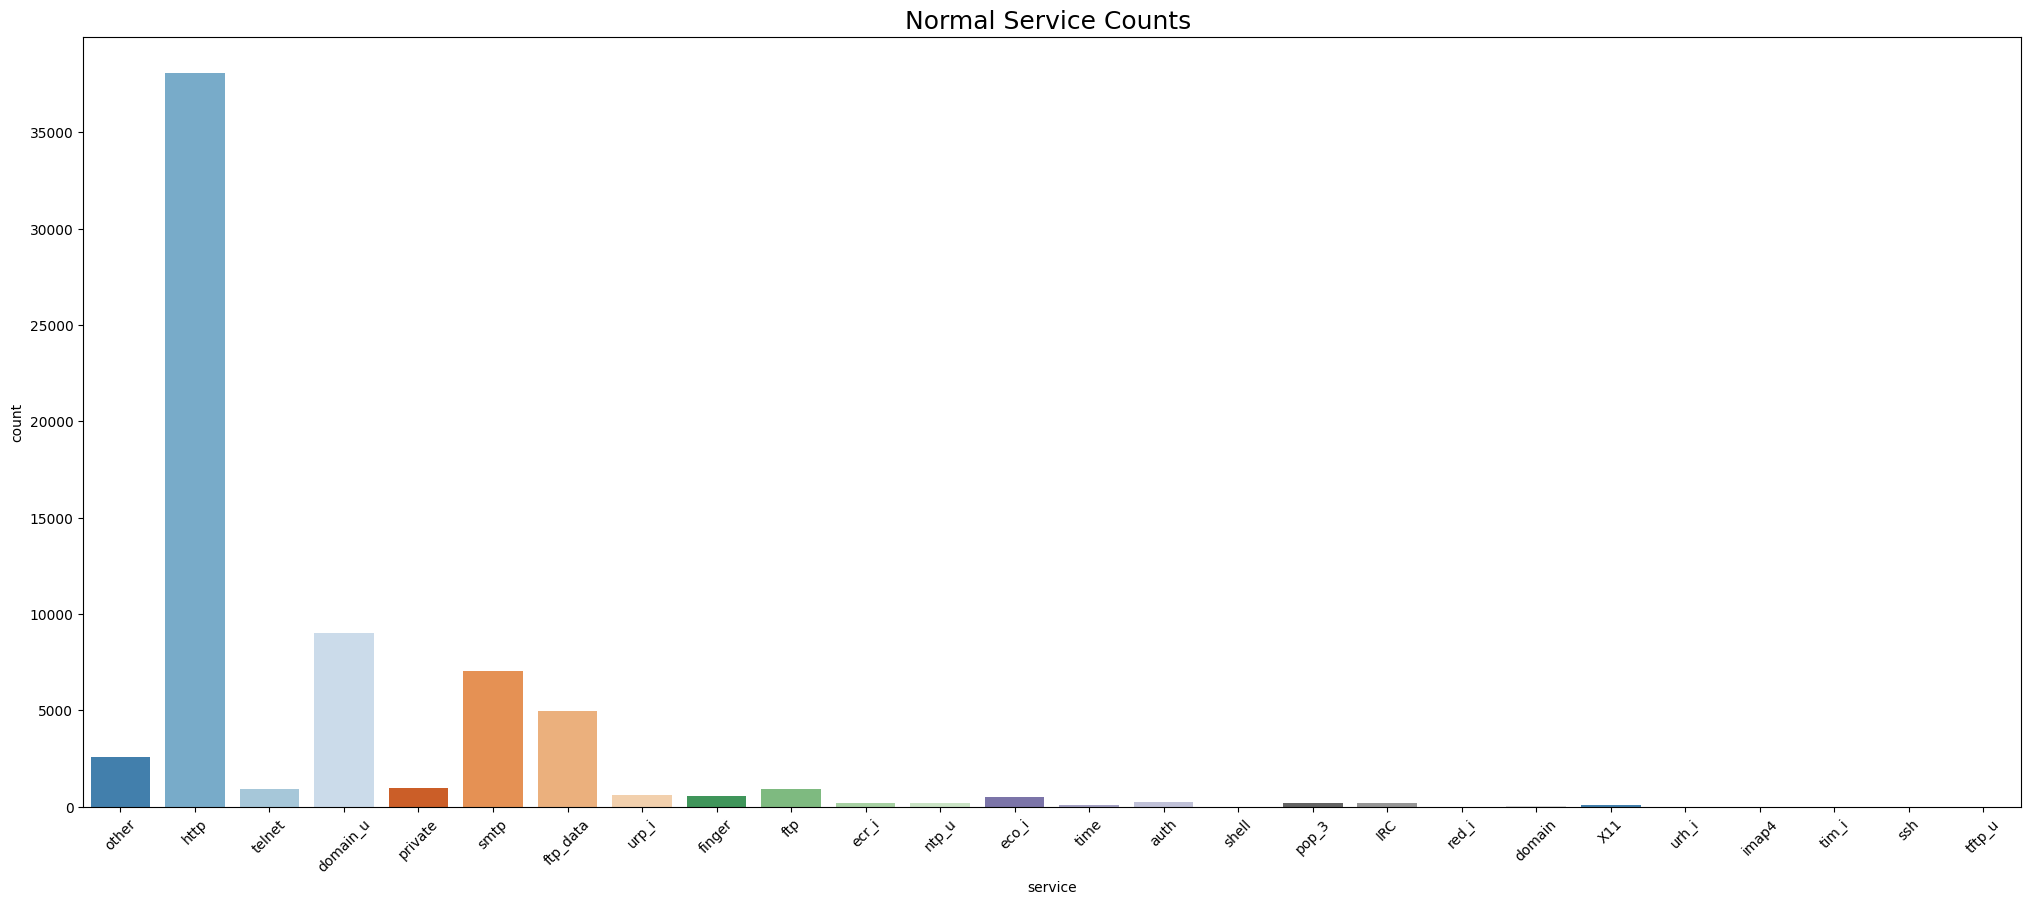

In [66]:
import seaborn as sb
import matplotlib.pyplot as mplot


mplot.figure(figsize=(25,10))

#All Data
# sb.countplot(x='service',data=dt)

#Only 'normal'
dt_onlynormal_filtered = dt[dt['attack']=='normal']
sb.countplot(x='service',data=dt_onlynormal_filtered, hue='service', palette='tab20c')
          
#Excluding 'normal'
dt_normal_filtered = dt[dt['attack']!='normal']
# sb.countplot(x='service',data=dt_normal_filtered)

#Excluding 'normal' and 'neptune'
categories_to_exclude=['normal','neptune']
df_filtered_multiple = dt[~dt['attack'].isin(categories_to_exclude)]
# sb.countplot(x='attack',data=df_filtered_multiple,hue='protocol_type',palette='pastel')

mplot.xticks(rotation=45)
mplot.title('Normal Service Counts ',fontdict={'fontsize':18})
mplot.show()

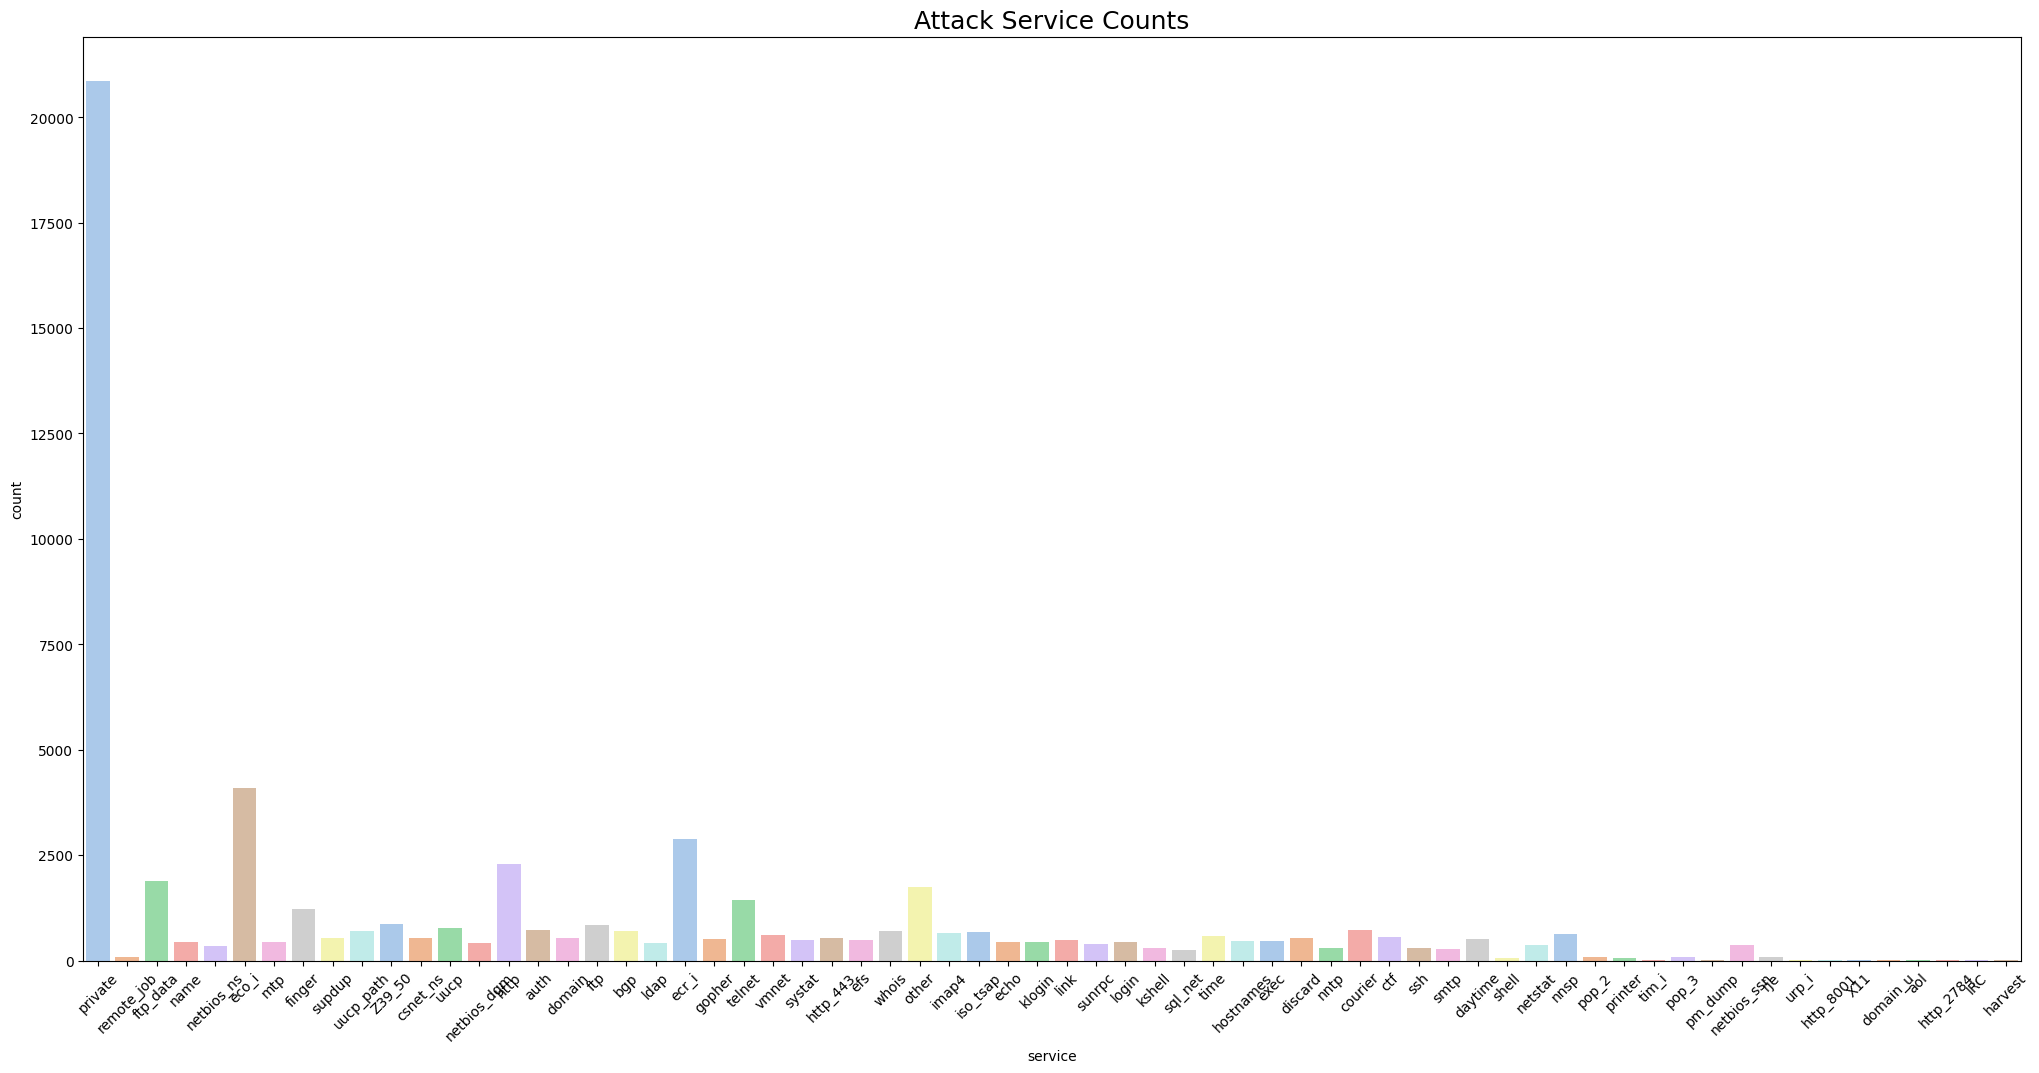

In [64]:
import seaborn as sb
import matplotlib.pyplot as mplot


mplot.figure(figsize=(25,12))

#All Data
# sb.countplot(x='service',data=dt)

#Only 'normal'
dt_onlynormal_filtered = dt[dt['attack']=='normal']
# sb.countplot(x='service',data=dt_onlynormal_filtered)
          
#Excluding 'normal'
dt_normal_filtered = dt[dt['attack']!='normal']
sb.countplot(x='service',data=dt_normal_filtered, hue='service',palette='pastel')

#Excluding 'normal' and 'neptune'
categories_to_exclude=['normal','neptune']
df_filtered_multiple = dt[~dt['attack'].isin(categories_to_exclude)]
# sb.countplot(x='attack',data=df_filtered_multiple,hue='protocol_type',palette='pastel')

mplot.xticks(rotation=45)
mplot.title('Attack Service Counts',fontdict={'fontsize':18})
mplot.show()

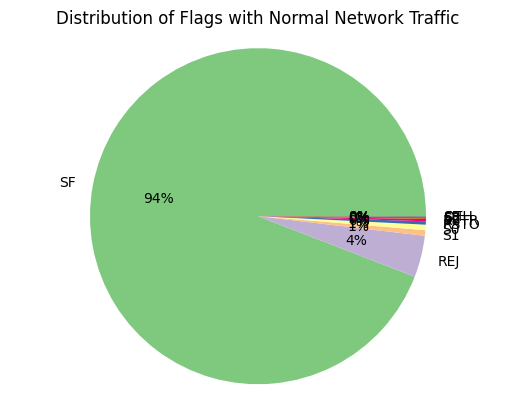

In [54]:
import pandas as pd
import numpy as np

# Sample data
# data = pd.Series([15, 30, 45, 10], index=['Category A', 'Category B', 'Category C', 'Category D'])


data = pd.Series(dt.loc[dt['attack']=='normal'].flag.value_counts())


# print(dt['flag'])
# Create the pie chart using Pandas' plot.pie()
mplot.pie(data, labels=data.index, autopct='%1.0f%%', startangle=0, colors=mplot.cm.Accent(np.arange(len(data))))
mplot.axis('equal') # Ensures a circular pie chart
mplot.title('Distribution of Flags with Normal Network Traffic')
mplot.show()

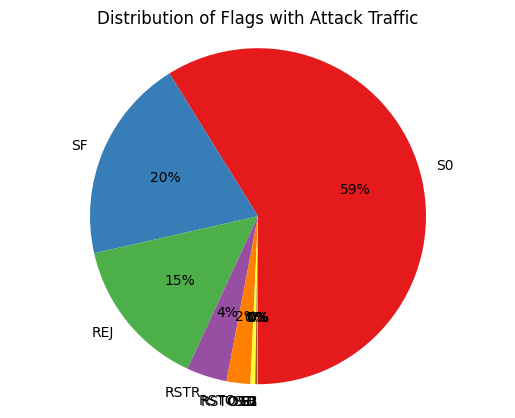

In [56]:
import pandas as pd

# Sample data
# data = pd.Series([15, 30, 45, 10], index=['Category A', 'Category B', 'Category C', 'Category D'])


data = pd.Series(dt.loc[dt['attack']!='normal'].flag.value_counts())

#Seaborn p deep, muted, pastel, bright, dark, and colorblind,

# print(dt['flag'])
# Create the pie chart using Pandas' plot.pie()
mplot.pie(data, labels=data.index, autopct='%1.0f%%', startangle=270, colors=mplot.cm.Set1(np.arange(len(data))))

mplot.axis('equal') # Ensures a circular pie chart
mplot.title('Distribution of Flags with Attack Traffic')
mplot.show()